### Importerar bibliotek

In [14]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

### Importerar dataset samt anger x och y

In [15]:
dataset =pd.read_csv('insurance.csv')

X = dataset.drop('charges', axis=1).values # Alla utom charges
y = dataset['charges'].values 

### Hanterar saknade värden om det finns

In [16]:
# Hanterar saknade värden (om det finns några saknade värden i numeriska kolumner)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, [0, 2, 3]] = imputer.fit_transform(X[:, [0, 2, 3]])  # Här antas kolumn 0, 2 och 3 är numeriska (age, bmi, children)

### Formaterar om kategoriska variabler till binära kolumner (1:or och 0:or)

In [17]:
# One-Hot Encoding av kategoriska variabler (sex, smoker, region)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X)

[[1.0 0.0 0.0 ... 19.0 27.9 0.0]
 [0.0 1.0 1.0 ... 18.0 33.77 1.0]
 [0.0 1.0 1.0 ... 28.0 33.0 3.0]
 ...
 [1.0 0.0 1.0 ... 18.0 36.85 0.0]
 [1.0 0.0 1.0 ... 21.0 25.8 0.0]
 [1.0 0.0 0.0 ... 61.0 29.07 0.0]]


### Dela upp i tränings- och testdata

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Skalning av numeriska funktioner

In [20]:
sc = StandardScaler()
X_train[:, -3:] = sc.fit_transform(X_train[:, -3:])  # Skalning av numeriska kolumner (ålder, bmi, children)
X_test[:, -3:] = sc.transform(X_test[:, -3:])

### Skapa och träna linjära regressionsmodellen

In [21]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Förutsägelser på testuppsättningen

In [22]:
y_pred = regressor.predict(X_test)

### Utvärdera modellen

In [23]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [24]:
print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²): 0.783190278308844
Mean Squared Error (MSE): 33659434.26763641
Root Mean Squared Error (RMSE): 5801.675125999078
Mean Absolute Error (MAE): 3984.841523317164


### Skriver ut förutsägelserna och de faktiska värdena för att jämföra

In [25]:
print("\nActual vs Predicted values (Test set):")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual vs Predicted values (Test set):
Actual: 9095.06825, Predicted: 8960.0
Actual: 5272.1758, Predicted: 5888.0
Actual: 29330.98315, Predicted: 36864.0
Actual: 9301.89355, Predicted: 8960.0
Actual: 33750.2918, Predicted: 26880.0
Actual: 4536.259, Predicted: 10496.0
Actual: 2117.33885, Predicted: -768.0
Actual: 14210.53595, Predicted: 15872.0
Actual: 3732.6251, Predicted: 1280.0
Actual: 10264.4421, Predicted: 10496.0
Actual: 18259.216, Predicted: 29440.0
Actual: 7256.7231, Predicted: 8448.0
Actual: 3947.4131, Predicted: 4352.0
Actual: 46151.1245, Predicted: 38656.0
Actual: 48673.5588, Predicted: 40448.0
Actual: 44202.6536, Predicted: 37376.0
Actual: 9800.8882, Predicted: 14080.0
Actual: 42969.8527, Predicted: 35840.0
Actual: 8233.0975, Predicted: 8448.0
Actual: 21774.32215, Predicted: 31232.0
Actual: 5080.096, Predicted: 4352.0
Actual: 7441.501, Predicted: 10240.0
Actual: 1256.299, Predicted: 2304.0
Actual: 2755.02095, Predicted: 6400.0
Actual: 11085.5868, Predicted: 10496.0
Actual: 

### Skapar en scatterplot för att jämföra förutsagda och faktiska värden

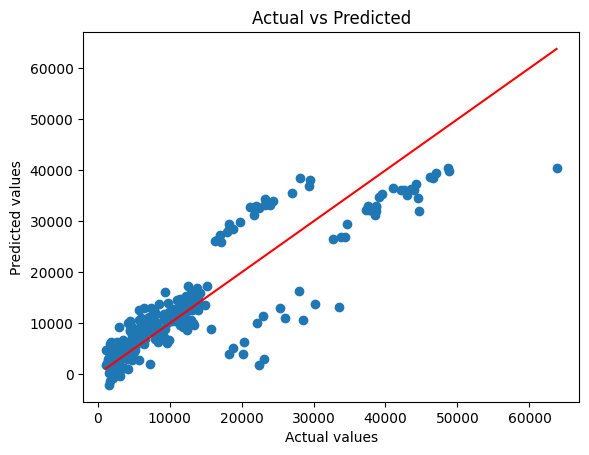

In [26]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal linje
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()